In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yilinhouuuuuu/asl-alphabet
#!kaggle datasets download -d yilinhouuuuuu/asl-test


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/yilinhouuuuuu/asl-alphabet
License(s): unknown
 74% 772M/1.02G [00:25<00:11, 24.0MB/s]

In [ ]:
!unzip asl-alphabet.zip
#!unzip /content/asl-test.zip

In [ ]:
import torch
from torchvision import transforms as T
from torchvision.datasets import ImageFolder
import torch.nn as nn
from torchvision.models import resnet18, resnet34, resnet50, inception_v3
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

In [ ]:
data_transforms = {
    'test': T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
}
test_dataset = ImageFolder(root='/content/asl_test', transform=data_transforms['test'])
batch_size = 256
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
num_classes = 29
save_path = '/content/InceptionV3.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')

In [ ]:
model = inception_v3(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)
loss_func = nn.CrossEntropyLoss()
test_count =0
test_loss = 0
test_correct = 0
test_total = 0
for images, labels in test_loader:
  test_count += 1
  model.eval()
  images, labels = images.to(device), labels.to(device)
  outputs = model(images)
  test_loss += loss_func(outputs, labels).data.cpu()
  predictions = torch.max(outputs, 1)[1]
  test_correct += (predictions == labels).sum().cpu()
  test_total += len(labels)

print(f'Test loss: {test_loss/test_count:.4f}, Test accuracy: {test_correct/test_total*100:.3f}%')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Test loss: 1.3397, Test accuracy: 84.663%


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(labels.cpu(), predictions.cpu())
print(conf_matrix)

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
data_transforms = {
    'train': T.Compose([
        T.RandomRotation(10),
        T.RandomHorizontalFlip(),
        T.Resize((224, 224)),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
    'test': T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ]),
}

train_dataset = ImageFolder(root='/content/asl_alphabet/train', transform=data_transforms['train'])
val_dataset = ImageFolder(root='/content/asl_alphabet/val', transform=data_transforms['val'])
test_dataset = ImageFolder(root='/content/asl_alphabet/test', transform=data_transforms['test'])

print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
num_classes = 29
save_path = '/content/resnet18.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')

69600
8700
8700


In [ ]:

model = resnet34(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
#device = 'cpu'

model.to(device)

loss_func = nn.CrossEntropyLoss()

num_epochs = 5
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size = 2, gamma=0.1)

train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

count = 0
for epoch in range(num_epochs):
    correct = 0
    total = 0
    epoch_loss = 0
    count = 0
    val_count = 0
    val_epoch_loss = 0
    val_correct =0
    val_total = 0
    for images, labels in train_loader:
        count += 1

        model.train()
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_func(outputs, labels)
        epoch_loss += loss.data.cpu()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        predictions = torch.max(outputs, 1)[1]

        correct += (predictions == labels).sum().cpu()
        #print(correct)
        total += len(labels)
        #print(f'Epoch: {epoch+1:02d}, Iteration: {count}, Train loss: {epoch_loss/count:.4f}, , Train accuracy: {correct/total*100:.3f}%')
        if count % 50 == 0:
            with torch.no_grad():
                for images, labels in val_loader:
                    val_count += 1
                    model.eval()
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    val_epoch_loss += loss_func(outputs, labels).data.cpu()
                    predictions = torch.max(outputs, 1)[1]
                    val_correct += (predictions == labels).sum().cpu()
                    val_total += len(labels)
            val_loss_list.append(val_epoch_loss/val_count)
            val_accuracy_list.append(val_correct/val_total)
            train_loss_list.append(epoch_loss/count)
            train_accuracy_list.append(correct/total)
            print(f'Epoch: {epoch+1:02d}, Iteration: {count}, Train loss: {epoch_loss/count:.4f}, , Train accuracy: {correct/total*100:.3f}%, Valid loss: {val_epoch_loss/val_count:.4f}, Valid accuracy: {val_correct/val_total*100:.3f}%')
    if epoch >= 2:
      scheduler.step()
    # if epoch == 1:
    #     for param in model.parameters():
    #         param.requires_grad = True



print('Finished Training')

torch.save(model.state_dict(), save_path)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 80.9MB/s]


Epoch: 01, Iteration: 50, Train loss: 1.0986, , Train accuracy: 77.562%, Valid loss: 0.3143, Valid accuracy: 92.552%
Epoch: 01, Iteration: 100, Train loss: 0.5807, , Train accuracy: 88.375%, Valid loss: 0.2195, Valid accuracy: 95.270%
Epoch: 01, Iteration: 150, Train loss: 0.3968, , Train accuracy: 92.115%, Valid loss: 0.1835, Valid accuracy: 95.977%
Epoch: 01, Iteration: 200, Train loss: 0.3017, , Train accuracy: 94.039%, Valid loss: 0.1776, Valid accuracy: 95.739%
Epoch: 01, Iteration: 250, Train loss: 0.2460, , Train accuracy: 95.128%, Valid loss: 0.1674, Valid accuracy: 96.016%
Epoch: 01, Iteration: 300, Train loss: 0.2089, , Train accuracy: 95.857%, Valid loss: 0.1559, Valid accuracy: 96.274%
Epoch: 01, Iteration: 350, Train loss: 0.1808, , Train accuracy: 96.424%, Valid loss: 0.1484, Valid accuracy: 96.333%
Epoch: 01, Iteration: 400, Train loss: 0.1592, , Train accuracy: 96.857%, Valid loss: 0.1403, Valid accuracy: 96.480%
Epoch: 01, Iteration: 450, Train loss: 0.1427, , Train ac

In [ ]:
model = inception_v3(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)

In [ ]:

test_count =0
test_loss = 0
test_correct = 0
test_total = 0
for images, labels in test_loader:
  test_count += 1
  model.eval()
  images, labels = images.to(device), labels.to(device)
  outputs = model(images)
  test_loss += loss_func(outputs, labels).data.cpu()
  predictions = torch.max(outputs, 1)[1]
  test_correct += (predictions == labels).sum().cpu()
  test_total += len(labels)

print(f'Test loss: {test_loss/test_count:.4f}, Test accuracy: {test_correct/test_total*100:.3f}%')

Test loss: 0.0577, Test accuracy: 98.345%


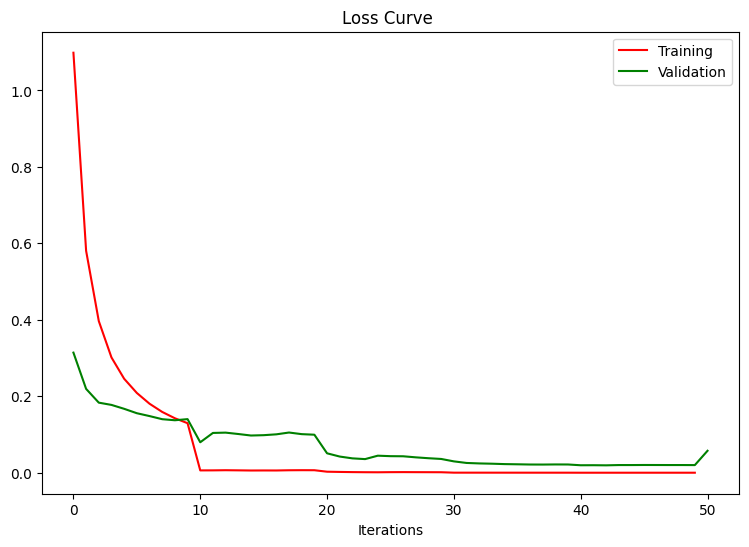

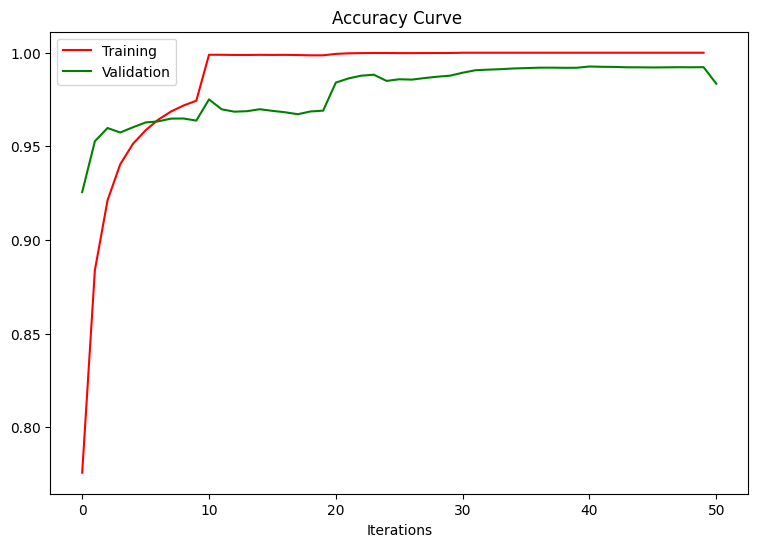

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))
plt.plot(train_loss_list, label = 'Training', color = 'r')
plt.plot(val_loss_list, label = 'Validation', color = 'g')
plt.title(f"Loss Curve ")
plt.xlabel("Iterations")
plt.legend()
plt.show()

plt.figure(figsize=(9, 6))
plt.plot(train_accuracy_list, label = 'Training', color = 'r')
plt.plot(val_accuracy_list, label = 'Validation', color = 'g')
plt.title(f"Accuracy Curve ")
plt.xlabel("Iterations")
plt.legend()
plt.show()

In [ ]:
!ps aux|grep python

root          71  0.1  0.0      0     0 ?        Z    06:19   0:05 [python3] <defunct>
root          72  0.1  0.4 236948 222284 ?       S    06:19   0:07 python3 /usr/local/bin/colab-file
root         124  0.1  0.2 604364 113316 ?       Sl   06:19   0:05 /usr/bin/python3 /usr/local/bin/j
root       11953  1.3  2.6 26915204 1390592 ?    Ssl  07:05   0:17 /usr/bin/python3 -m colab_kernel_
root       11980  0.1  0.0 539404 13620 ?        Sl   07:05   0:02 /usr/bin/python3 /usr/local/lib/p
root       17658  0.0  0.0   7376  3556 ?        S    07:27   0:00 /bin/bash -c ps aux|grep python
root       17660  0.0  0.0   6484  2260 ?        S    07:27   0:00 grep python


In [ ]:
!kill -9 11953